In [3]:
import os
if os.environ.get("RUN_VOILA_ONCE") != "1":
    os.environ["RUN_VOILA_ONCE"] = "1"
    !voila premier_league_dashboard.ipynb --port=8866 --no-browser --show_tracebacks=True

# Failed Tests

In [95]:
# league_df.loc[:, "top_6"] = league_df["Rk"] < 6
# league_df.loc[:, "relegated"] = league_df["Rk"] >= 17

# X = league_df[numeric_cols]
# y_top6 = league_df["top_6"].astype(int)

# X_train, X_test, y_train, y_test = train_test_split(X, y_top6, test_size=0.3, random_state=42)

# model_top6 = RandomForestClassifier(n_estimators=100, random_state=42)
# model_top6.fit(X_train, y_train)
# print("🏆 Top 6 Prediction:")
# print(classification_report(y_test, model_top6.predict(X_test)))

# y_relegation = league_df["relegated"].astype(int)

# X_train, X_test, y_train, y_test = train_test_split(X, y_relegation, test_size=0.3, random_state=42)

# model_relegation = RandomForestClassifier(n_estimators=100, random_state=42)
# model_relegation.fit(X_train, y_train)
# print("⛔ Relegation Prediction:")
# print(classification_report(y_test, model_relegation.predict(X_test)))



In [86]:
# import requests
# import lxml
# from bs4 import BeautifulSoup, Comment
# import pandas as pd
# import time

# # Step 1: Define Seasons
# season_ids = {
#     "2016-2017": "1526",
#     "2017-2018": "1889",
#     "2018-2019": "3232",
#     "2019-2020": "3233",
#     "2020-2021": "10728"
# }

# base_url = "https://fbref.com/en/comps/9/{}/{}-Premier-League-Stats"
# player_url = ""

# headers = {"User-Agent": "Mozilla/5.0"}


# # Step 2: For each season, scrape top team and their top scorer
# for season, season_id in season_ids.items():
#     print(f"\n🔍 Processing {season}...")
#     url = base_url.format(season_id, season)

#     try:
#         res = requests.get(url, headers=headers)
#         with open(f"{season}.html", "w", encoding="utf-8") as f:
#             f.write(res.text)
#         tables = pd.read_html(res.text)

#         league_table = tables[0]
#         if isinstance(league_table.columns, pd.MultiIndex):
#             league_table.columns = league_table.columns.get_level_values(1)

#         league_table = league_table[league_table["Squad"].notna() & ~league_table["Squad"].str.contains("Average")]
#         top_team = league_table.iloc[0]["Squad"]
#         top_scorer = league_table.iloc[0]["Top Team Scorer"]
#         top_scorer_name = top_scorer.split(" - ")[0]
#         print(f"🏆 Top Team: {top_team}")
#         print(f"⚽ Top Scorer: {top_scorer_name}")
#         time.sleep(10)

# #         # Step 3: Parse player stats and find top scorer from top team
# #         soup = BeautifulSoup(res.text, "lxml")  # lxml parser

# #         # Extract all comments (tables may be hidden in them)
# #         comments = soup.find_all(string=lambda text: isinstance(text, Comment))

# #         stats_table_html = None
# #         for comment in comments:
# #             if 'id="stats_standard"' in comment:
# #                 comment_soup = BeautifulSoup(comment, "lxml")
# #                 stats_table_html = comment_soup.find("table", id="stats_standard")
# #                 break

# #         if stats_table_html is None:
# #             print("⚠️ Could not find player stats table.")
# #             continue

# #         # Parse the table into DataFrame
# #         df = pd.read_html(str(stats_table_html), flavor='lxml')[0]

# #         # Drop multi-level columns if present
# #         if isinstance(df.columns, pd.MultiIndex):
# #             df.columns = df.columns.get_level_values(1)

# #         # Filter players from the top team
# #         df = df[df["Squad"] == top_team]

# #         # Clean goals column
# #         df["Gls"] = pd.to_numeric(df["Gls"], errors="coerce")
# #         df = df[df["Gls"].notna()]

# #         if df.empty:
# #             print(f"⚠️ No goal data for top team: {top_team}")
# #             continue

# #         # Find top scorer
# #         top_scorer_row = df.sort_values("Gls", ascending=False).iloc[0]
# #         player_name = top_scorer_row["Player"]
# #         print(f"🎯 Top Scorer: {player_name} ({top_scorer_row['Gls']} goals)")

# #         # Step 4: Get link to player profile
# #         # Use comment_soup from the parsed comment (not main soup)
# #         player_links = stats_table_html.select("th[data-stat='player'] a")

# #         player_url = None
# #         for a in player_links:
# #             if a.text.strip() == player_name:
# #                 player_url = "https://fbref.com" + a['href']
# #                 break

# #         if not player_url:
# #             print("⚠️ Player URL not found.")
# #             continue

# #         # Step 5: Scrape Goal and Shot Creation table
# #         print(f"📄 Fetching creation stats: {player_url}")
# #         res_player = requests.get(player_url, headers=headers)
# #         soup_player = BeautifulSoup(res_player.text, "lxml")

# #         # Extract all HTML comments and search for the gca table
# #         goal_creation_df = None
# #         from bs4 import Comment

# #         comments = soup_player.find_all(string=lambda text: isinstance(text, Comment))  # ✅ HTML comments only

# #         for comment in comments:
# #             if "stats_gca" in comment:  # check if this comment contains the gca table
# #                 try:
# #                     comment_soup = BeautifulSoup(comment, "lxml")
# #                     gca_table = comment_soup.find("table", id="stats_gca")
# #                     if gca_table:
# #                         goal_creation_df = pd.read_html(str(gca_table), flavor='lxml')[0]  # ✅ use lxml flavor
# #                         goal_creation_df["Season"] = season
# #                         goal_creation_df["Player"] = player_name
# #                         break
# #                 except Exception as e:
# #                     print(f"⚠️ Error parsing stats_gca: {e}")
# #                     continue

# #         if goal_creation_df is not None:
# #             top_players.append(goal_creation_df)
# #         else:
# #             print("⚠️ Goal Creation table not found.")

# #         time.sleep(10)


#     except Exception as e:
#         print(f"❌ Error processing {season}: {e}")
#         continue

# # # Step 6: Combine all scraped data
# # if top_players:
# #     final_df = pd.concat(top_players, ignore_index=True)
# #     final_df.to_csv("top_scorers_goal_creation.csv", index=False)
# #     print("\n✅ Goal and Shot Creation data saved to CSV.")
# #     display(final_df.head())
# # else:
# #     print("❌ No data collected.")


In [57]:
# import pandas as pd
# import time
# import plotly.express as px
# import ipywidgets as widgets
# from IPython.display import display
# import requests

# # --- 1. Load Multi-Season Data ---
# season_ids = {
#     "2016-2017": "1526",
#     "2017-2018": "1889",
#     "2018-2019": "3232",
#     "2019-2020": "3233",
#     "2020-2021": "10728"
# }

# base_url = "https://fbref.com/en/comps/9/{}/{}-Premier-League-Stats"
# headers = {
#     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
# }

# all_seasons = []

# for season, season_id in season_ids.items():
#     url = base_url.format(season_id, season)
#     print(f"🔽 Loading {season}...")

#     try:
#         res = requests.get(url, headers=headers)
#         res.raise_for_status()

#         with open(f"{season}.html", "w", encoding="utf-8") as f:
#             f.write(res.text)

#         tables = pd.read_html(res.text)
#         df = tables[0]

#         if isinstance(df.columns, pd.MultiIndex):
#             df.columns = df.columns.get_level_values(1)

#         df = df[df["Squad"].notna() & ~df["Squad"].str.contains("Average")]
#         df["Season"] = season
#         all_seasons.append(df)

#         time.sleep(10)

#     except Exception as e:
#         print(f"❌ Failed to load {season}: {e}")
#         continue

# # Combine all into one DataFrame
# league_df = pd.concat(all_seasons, ignore_index=True)

# # Convert numeric columns safely
# numeric_cols = ['W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'xG', 'xGA', 'xGD', 'xGD/90']
# league_df[numeric_cols] = league_df[numeric_cols].apply(pd.to_numeric, errors="coerce")
# league_df = league_df.dropna(subset=numeric_cols)

# # --- 3. Build Dashboard Widgets ---
# season_dropdown = widgets.Dropdown(
#     options=sorted(league_df["Season"].unique()),
#     value="2020-2021",
#     description="Season:"
# )

# def update_dashboard(selected_season):
#     season_data = league_df[league_df["Season"] == selected_season].copy()

#     # Display league table
#     display(season_data[["Rk", "Squad", "W", "D", "L", "GF", "GA", "GD", "Pts", "Top Team Scorer"]]
#             .sort_values(by="Pts", ascending=False).reset_index(drop=True))

#     # Bar chart of team points
#     fig = px.bar(
#         season_data.sort_values(by="Pts", ascending=False),
#         x="Squad", y="Pts", title=f"Premier League {selected_season} Points",
#         text="Pts", height=450
#     )
#     fig.update_traces(textposition='outside')
#     fig.update_layout(xaxis_tickangle=-45, margin=dict(t=40, b=100))
#     fig.show()

# # Interactive output
# widgets.interact(update_dashboard, selected_season=season_dropdown)


🔽 Loading 2016-2017...
❌ Failed to load 2016-2017: 403 Client Error: Forbidden for url: https://fbref.com/en/comps/9/1526/2016-2017-Premier-League-Stats
🔽 Loading 2017-2018...
❌ Failed to load 2017-2018: 403 Client Error: Forbidden for url: https://fbref.com/en/comps/9/1889/2017-2018-Premier-League-Stats
🔽 Loading 2018-2019...
❌ Failed to load 2018-2019: 403 Client Error: Forbidden for url: https://fbref.com/en/comps/9/3232/2018-2019-Premier-League-Stats
🔽 Loading 2019-2020...
❌ Failed to load 2019-2020: 403 Client Error: Forbidden for url: https://fbref.com/en/comps/9/3233/2019-2020-Premier-League-Stats
🔽 Loading 2020-2021...
❌ Failed to load 2020-2021: 403 Client Error: Forbidden for url: https://fbref.com/en/comps/9/10728/2020-2021-Premier-League-Stats


ValueError: No objects to concatenate

In [96]:
# sample_team = pd.DataFrame([{
#     "W": 21, "D": 10, "L": 7,
#     "GF": 68, "GA": 40, "GD": 28,
#     "Pts": 73, "xG": 70.2, "xGA": 42.1, "xGD": 28.1, 
#     "xGD/90": 0.74
# }])

# result = model.predict(sample_team)[0]
# print("Top 4 Prediction:", "Yes" if result == 1 else "No")


In [97]:
# sample_team = pd.DataFrame([{
#     "W": 13, "D": 9, "L": 16,
#     "GF": 48, "GA": 58, "GD": -10,
#     "Pts": 48, "xG": 49.2, "xGA": 60.5, "xGD": -11.3,
#     "xGD/90": -0.3
# }])

# print("Top 6?", "✅ Yes" if model_top6.predict(sample_team)[0] else "❌ No")
# print("Relegated?", "⛔ Yes" if model_relegation.predict(sample_team)[0] else "✅ Safe")

# Test Model and API

In [ ]:
#pip install fastapi uvicorn scikit-learn pandas joblib ipywidgets nest_asyncio requests lxml voila matplotlib selenium  

In [147]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

# Simulated dataset
data = {
    "home_team_rank": [1, 3, 5, 2, 8, 6],
    "away_team_rank": [10, 7, 2, 4, 1, 5],
    "home_goals_avg": [3, 2, 2, 2, 1, 1],
    "away_goals_avg": [1, 1, 2, 1, 2, 1],
    "result": [2, 2, 1, 2, 0, 1]  # 0 = away win, 1 = draw, 2 = home win
}

df = pd.DataFrame(data)
X = df.drop("result", axis=1)
y = df["result"]

model = RandomForestClassifier()
model.fit(X, y)

joblib.dump(model, "rf_model.pkl")
print("✅ Model trained and saved.")


✅ Model trained and saved.


In [83]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import nest_asyncio
import uvicorn
import threading

# Required to run FastAPI inside Jupyter
nest_asyncio.apply()

app = FastAPI()
model = joblib.load("rf_model.pkl")

label_map = {0: "Away Win", 1: "Draw", 2: "Home Win"}

class MatchInput(BaseModel):
    home_team_rank: int
    away_team_rank: int
    home_goals_avg: float
    away_goals_avg: float

@app.post("/predict")
def predict(match: MatchInput):
    features = [
        match.home_team_rank,
        match.away_team_rank,
        match.home_goals_avg,
        match.away_goals_avg
    ]
    prediction = model.predict([features])[0]
    return {"prediction": label_map[int(prediction)]}

# Run the server in a thread so notebook isn't blocked
def run_api():
    uvicorn.run(app, host="127.0.0.1", port=8000)

thread = threading.Thread(target=run_api, daemon=True)
thread.start()


## Sample Prediction with Sliders using an ensemble model

In [7]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import requests

# Create sliders that accept only whole numbers
home_rank = widgets.IntSlider(description="Home Rank", min=1, max=20, value=1)
away_rank = widgets.IntSlider(description="Away Rank", min=1, max=20, value=10)
home_avg = widgets.IntSlider(description="Home Goals Avg", min=0, max=5, step=1, value=2)
away_avg = widgets.IntSlider(description="Away Goals Avg", min=0, max=5, step=1, value=1)

btn = widgets.Button(description="Predict Outcome", button_style="success")
output = widgets.Output()

def on_click(b):
    with output:
        clear_output()
        payload = {
            "home_team_rank": home_rank.value,
            "away_team_rank": away_rank.value,
            "home_goals_avg": home_avg.value,
            "away_goals_avg": away_avg.value
        }
        try:
            res = requests.post("http://127.0.0.1:8000/predict", json=payload)
            prediction = res.json()["prediction"]
            print(f"🏟️ Prediction: {prediction}")
        except Exception as e:
            print("❌ API error:", e)

btn.on_click(on_click)

display(home_rank, away_rank, home_avg, away_avg, btn, output)


IntSlider(value=1, description='Home Rank', max=20, min=1)

IntSlider(value=10, description='Away Rank', max=20, min=1)

IntSlider(value=2, description='Home Goals Avg', max=5)

IntSlider(value=1, description='Away Goals Avg', max=5)

Button(button_style='success', description='Predict Outcome', style=ButtonStyle())

Output()

# Web Scraping and Collection of Data

## Web scraping the goals of Premier League teams from 2016-2021

In [5]:
import requests
import pandas as pd
from ipywidgets import interact, widgets
from IPython.display import display

BASE = "https://footballapi.pulselive.com/football/stats/ranked/teams"

def fetch_team_stats(stat_type="goals", season_id=418, page_size=100):
    url = f"{BASE}/{stat_type}"
    params = {
        "compSeasons": season_id,
        "comps": 1,
        "pageSize": page_size,
        "page": 0
    }
    headers = {
        "Origin": "https://www.premierleague.com",
        "Referer": "https://www.premierleague.com/stats/top/clubs",
        "User-Agent": "Mozilla/5.0"
    }
    resp = requests.get(url, params=params, headers=headers)
    resp.raise_for_status()
    return resp.json()

def team_stats_to_df(data, stat_field, season):
    content = data.get("stats", {}).get("content", [])
    rows = []
    for t in content:
        team = t["owner"]
        value = t.get("value", 0)
        # Round to whole number
        value = int(round(value)) if value is not None else 0
        rows.append({
            "season": season,
            "team": team["name"],
            stat_field: value
        })
    return pd.DataFrame(rows)

def display_team_dropdown(df, stat_field):
    teams = df["team"].unique()
    dropdown = widgets.Dropdown(options=sorted(teams), description="Team:")

    def show_team_stats(team_name):
        team_df = df[df["team"] == team_name].copy()
        # Ensure stat field is integer type for display
        team_df[stat_field] = team_df[stat_field].astype(int)
        display(team_df.sort_values("season"))

    interact(show_team_stats, team_name=dropdown)

def main():
    season_ids = {
        "2016–17": 54,
        "2017–18": 79,
        "2018–19": 210,
        "2019–20": 274,
        "2020–21": 363
    }

    all_data = []
    stat_field = "goals"

    for season, sid in season_ids.items():
        print(f"Fetching data for {season}...")
        try:
            data = fetch_team_stats(stat_field, sid)
            df = team_stats_to_df(data, stat_field, season)
            all_data.append(df)
        except Exception as e:
            print(f"Failed to fetch {season}: {e}")

    if all_data:
        full_df = pd.concat(all_data, ignore_index=True)
        full_df[stat_field] = pd.to_numeric(full_df[stat_field], errors='coerce').fillna(0).astype(int)
        display_team_dropdown(full_df, stat_field)
        # Save as CSV with whole numbers
        full_df.to_csv("epl_team_goals_2016_to_2021.csv", index=False)

if __name__ == "__main__":
    main()


Fetching data for 2016–17...
Fetching data for 2017–18...
Fetching data for 2018–19...
Fetching data for 2019–20...
Fetching data for 2020–21...


interactive(children=(Dropdown(description='Team:', options=('Arsenal', 'Aston Villa', 'Bournemouth', 'Brighto…

## Collection of the goals of top players and their positions from the 2016-2021 seasons

In [36]:
import requests
import pandas as pd
from IPython.display import display
import ipywidgets as widgets

BASE = "https://footballapi.pulselive.com/football/stats/ranked/players"

def fetch_stats(stat_type="goals", season_id=418, page_size=100):
    url = f"{BASE}/{stat_type}"
    params = {
        "compSeasons": season_id,
        "comps": 1,
        "pageSize": page_size,
        "page": 0
    }
    headers = {
        "Origin": "https://www.premierleague.com",
        "Referer": "https://www.premierleague.com/stats/top/players",
        "User-Agent": "Mozilla/5.0"
    }
    resp = requests.get(url, params=params, headers=headers)
    resp.raise_for_status()
    data = resp.json()
    return data

def stats_to_df(data, stat_field, season):
    content = data.get("stats", {}).get("content", [])
    rows = []
    for p in content:
        owner = p["owner"]
        rows.append({
            "season": season,
            "player": owner["name"]["display"],
            "club": owner.get("currentTeam", {}).get("name", ""),
            "position": owner.get("info", {}).get("positionInfo", ""),
            stat_field: p.get("value")
        })
    return pd.DataFrame(rows)

def main():
    season_ids = {
        "2016–17": 54,
        "2017–18": 79,
        "2018–19": 210,
        "2019–20": 274,
        "2020–21": 363
    }

    all_data = []

    for season, sid in season_ids.items():
        print(f"Fetching data for {season}...")
        try:
            data = fetch_stats("goals", sid)
            df = stats_to_df(data, "goals", season)
            all_data.append(df)
        except Exception as e:
            print(f"Failed to fetch {season}: {e}")

    # Combine all seasons
    full_df = pd.concat(all_data, ignore_index=True)

    # Convert goals to numeric
    full_df["goals"] = pd.to_numeric(full_df["goals"], errors="coerce").fillna(0)
    
        # Drop rows with NaN values in any column
    full_df = full_df.dropna()

    # Remove rows with empty strings in 'club' or 'position'
    full_df = full_df[
        (full_df["club"].str.strip() != "") &
        (full_df["position"].str.strip() != "")
    ]
    
    # Get most recent club and position info per player
    latest_info = (
        full_df.sort_values("season", ascending=False)
               .drop_duplicates("player")
               .set_index("player")[["club", "position"]]
    )

    # Sum total goals
    goal_totals = (
        full_df.groupby("player", as_index=False)
               .agg(total_goals=("goals", "sum"))
               .set_index("player")
    )
    goal_totals["total_goals"] = goal_totals["total_goals"].astype(int)

    # Merge totals with latest info
    final_df = goal_totals.join(latest_info).reset_index()
    final_df = final_df.sort_values("total_goals", ascending=False)

    final_df.to_csv("epl_total_goals_2016_to_2021.csv", index=False)
    def show_interactive_table(df):
        # Create a slider for top N players
        max_rows = min(25, len(df))
        row_slider = widgets.IntSlider(value=10, min=5, max=max_rows, step=1, description='Top Number:')
        @widgets.interact(n=row_slider)
        def update_table(n):
            display(df.head(n))

    # Show interactive table with slider
    show_interactive_table(final_df)

if __name__ == "__main__":
    main()


Fetching data for 2016–17...
Fetching data for 2017–18...
Fetching data for 2018–19...
Fetching data for 2019–20...
Fetching data for 2020–21...


interactive(children=(IntSlider(value=10, description='Top Number:', max=25, min=5), Output()), _dom_classes=(…

## Webscraping odds for upcoming bets

In [34]:
import requests
import pandas as pd
from IPython.display import display

# Fetch odds data
api_key = "715e53122632d63ff9be1a28b8ce0252"
url = f"https://api.the-odds-api.com/v4/sports/soccer_epl/odds/?apiKey={api_key}&regions=uk&markets=h2h"

response = requests.get(url)
data = response.json()

# Parse and flatten the data
rows = []
for match in data:
    match_time = pd.to_datetime(match['commence_time'])  # Convert to datetime
    home = match['home_team']
    away = match['away_team']
    fixture = f"{home} vs {away}"

    for bookmaker in match.get('bookmakers', []):
        bookmaker_name = bookmaker['title']
        for market in bookmaker.get('markets', []):
            if market['key'] == 'h2h':
                outcomes = {outcome['name']: outcome['price'] for outcome in market['outcomes']}
                row = {
                    'match_time': match_time,
                    'match': fixture,
                    'bookmaker': bookmaker_name,
                    'home_team': home,
                    'away_team': away,
                    'home_win_odds': outcomes.get(home),
                    'draw_odds': outcomes.get('Draw'),
                    'away_win_odds': outcomes.get(away)
                }
                rows.append(row)

# Create DataFrame
df = pd.DataFrame(rows)

# Save to CSV
df.to_csv("odds_api.csv", index=False)
print("✅ Odds saved to 'odds_api.csv'")

df_top15 = df.head(15)

# Stylized table
styled_df = (
    df_top15.style
    .format({"match_time": lambda x: x.strftime("%Y-%m-%d %H:%M")})
    .highlight_min(subset=["home_win_odds", "draw_odds", "away_win_odds"], color="lightgreen")
    .set_table_styles([
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]}
    ])
    .set_caption("💸 Top 15 Premier League Odds (H2H) by Bookmaker")
)

# Display in Jupyter
display(styled_df)


✅ Odds saved to 'odds_api.csv'


,match_time,match,bookmaker,home_team,away_team,home_win_odds,draw_odds,away_win_odds
0,2025-08-15 19:00,Liverpool vs Bournemouth,Paddy Power,Liverpool,Bournemouth,1.330000,5.500000,7.500000
1,2025-08-15 19:00,Liverpool vs Bournemouth,Coral,Liverpool,Bournemouth,1.360000,5.250000,7.500000
2,2025-08-15 19:00,Liverpool vs Bournemouth,Unibet,Liverpool,Bournemouth,1.340000,5.200000,7.000000
3,2025-08-15 19:00,Liverpool vs Bournemouth,LiveScore Bet,Liverpool,Bournemouth,1.340000,5.000000,6.500000
4,2025-08-15 19:00,Liverpool vs Bournemouth,Smarkets,Liverpool,Bournemouth,1.350000,5.800000,8.400000
5,2025-08-15 19:00,Liverpool vs Bournemouth,Grosvenor,Liverpool,Bournemouth,1.340000,5.200000,7.000000
6,2025-08-15 19:00,Liverpool vs Bournemouth,Casumo,Liverpool,Bournemouth,1.340000,5.200000,7.000000
7,2025-08-15 19:00,Liverpool vs Bournemouth,LeoVegas,Liverpool,Bournemouth,1.320000,4.800000,6.250000
8,2025-08-15 19:00,Liverpool vs Bournemouth,888sport,Liverpool,Bournemouth,1.360000,5.000000,7.000000
9,2025-08-15 19:00,Liverpool vs Bournemouth,Ladbrokes,Liverpool,Bournemouth,1.360000,5.250000,7.500000


# Dashboard and ML models

In [1]:
import pandas as pd
import panel as pn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

pn.extension()
# Load player goals data for the bar chart
df_players = pd.read_csv("epl_total_goals_2016_to_2021.csv")
# Load team data for model
df = pd.read_csv("epl_team_goals_2016_to_2021.csv")

# Create rank and labels
df["rank_in_season"] = df.groupby("season")["goals"].rank(method="first", ascending=False)
df["top_4"] = (df["rank_in_season"] <= 4).astype(int)
df["top_10"] = (df["rank_in_season"] <= 10).astype(int)

# Load betting data
df_bets = pd.read_csv("odds_api.csv")
df_bets = df_bets.dropna(subset=["home_win_odds", "draw_odds", "away_win_odds"])
np.random.seed(42)
df_bets["result"] = np.random.choice(["home", "draw", "away"], size=len(df_bets))

# Encode labels
le_bets = LabelEncoder()
y_bets = le_bets.fit_transform(df_bets["result"])
X_bets = df_bets[["home_win_odds", "draw_odds", "away_win_odds"]].values

# Train/test split
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_bets, y_bets, test_size=0.2, random_state=42)

# Train MLP model
model_bets = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=10000, random_state=42)
model_bets.fit(Xb_train, yb_train)

# Accuracy score
betting_accuracy = accuracy_score(yb_test, model_bets.predict(Xb_test))
accuracy_pane = pn.pane.Markdown(f"✅ **Test Accuracy:** {round(betting_accuracy * 100, 2)}%")

unique_matches = df_bets["match"].drop_duplicates().sort_values().tolist()
bet_selector = pn.widgets.Select(name="Select Bet (Fixture)", options=unique_matches)

# Pane for displaying result
bet_prediction_pane = pn.pane.Markdown()
top_scorers_pane = pn.pane.Matplotlib()
# Model training function remains unchanged
def train_model(target_col):
    X = df[["goals"]]
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    fig, ax = plt.subplots(figsize=(8,6))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax)
    plt.close(fig)

    return model, report_df, fig

# Function to create the bar chart figure for top 10 scorers
def create_top_scorers_chart():
    top_10 = df_players.nlargest(10, "total_goals")
    fig, ax = plt.subplots(figsize=(8, 4))
    bars = ax.barh(top_10["player"], top_10["total_goals"], color="darkblue")
    ax.set_xlabel("Total Goals (2016–2021)")
    ax.set_title("Top 10 Premier League Goal Scorers (2016–2021)")
    ax.invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        ax.text(width + 1, bar.get_y() + bar.get_height() / 2, str(int(width)), va='center')

    plt.tight_layout()
    plt.close(fig)  # Close so Panel can manage it properly
    return fig

def show_top_scorers():
    df = pd.read_csv("epl_total_goals_2016_to_2021.csv")

    # Sort by total goals descending (optional)
    df = df.sort_values("total_goals", ascending=False).head(10)

    # Plot line graph: players vs total goals
    plt.figure(figsize=(8,4))
    plt.plot(df["player"], df["total_goals"], marker='o', linestyle='-')

    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Player")
    plt.ylabel("Total Goals (2016-2021)")
    plt.title("Premier League Player Total Goals (2016-2021)")
    plt.tight_layout()
    plt.grid(True)
    plt.tight_layout()

    fig = plt.gcf()    
    plt.close()        
    return fig

top_n_slider = pn.widgets.IntSlider(name="Top N Scorers", start=5, end=20, step=1, value=10)
# Dynamic plot function
def update_top_scorers(event=None):
    n = top_n_slider.value
    top_n = df_players.sort_values("total_goals", ascending=False).head(n)

    fig, ax = plt.subplots(figsize=(8, 4))
    bars = ax.barh(top_n["player"], top_n["total_goals"], color="darkgreen")
    ax.set_xlabel("Total Goals (2016–2021)")
    ax.set_title(f"Top {n} Premier League Goal Scorers (2016–2021)")
    ax.invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        ax.text(width + 1, bar.get_y() + bar.get_height() / 2, str(int(width)), va='center')

    plt.tight_layout()
    plt.close(fig)
    top_scorers_pane.object = fig

def update_bet_prediction(event=None):
    match = bet_selector.value
    row = df_bets[df_bets["match"] == match].iloc[0]
    odds_array = np.array([[row["home_win_odds"], row["draw_odds"], row["away_win_odds"]]])
    prediction = le_bets.inverse_transform(model_bets.predict(odds_array))[0]
    bet_prediction_pane.object = f"🧾 **Predicted Outcome for `{match}`:** `{prediction.upper()}`"

bet_selector.param.watch(update_bet_prediction, "value")
update_bet_prediction()

# Trigger update when slider changes
top_n_slider.param.watch(update_top_scorers, "value")

# Initial call
update_top_scorers()
    
# Panel widgets
goal_input = pn.widgets.IntInput(name="Goals Scored", value=68, step=1)
target_selector = pn.widgets.RadioButtonGroup(name="Target", options=["top_4", "top_10"], button_type="primary")

# New dropdown for team selection
team_selector = pn.widgets.Select(name="Team", options=list(df["team"].unique()))

# New pane for the team's historical goals
team_goals_pane = pn.pane.DataFrame()
report_pane = pn.pane.DataFrame()
cm_pane = pn.pane.Matplotlib()
prediction_pane = pn.pane.Str()
top_scorers_pane = pn.pane.Matplotlib(create_top_scorers_chart())
show_top_scorers_pane = pn.pane.Matplotlib(show_top_scorers())

def update_dashboard(event=None):
    model, report, fig = train_model(target_selector.value)
    report_pane.object = report
    cm_pane.object = fig

    input_df = pd.DataFrame([[goal_input.value]], columns=["goals"])
    prediction = model.predict(input_df)[0]
    label = "✅Yes" if prediction == 1 else "❌No"
    prediction_pane.object = f"Will the team finish in {target_selector.value.upper()}? ➜ {label}"

    # Update the team goals pane based on the selected team
    selected_team_data = df[df["team"] == team_selector.value][["season", "team", "goals"]]
    team_goals_pane.object = selected_team_data

goal_input.param.watch(update_dashboard, "value")
target_selector.param.watch(update_dashboard, "value")
team_selector.param.watch(update_dashboard, "value") # Watch the new team selector

update_dashboard()

template = pn.template.MaterialTemplate(title="Premier League Goals Predictor")

template.sidebar.append(
    pn.Column(
        "## ⚙️ Inputs",
        goal_input,
        target_selector,
        team_selector, # Add the team selector here
        pn.layout.Divider(),
        pn.pane.Markdown("### Team Historical Goals"), # Add a header for the table
        team_goals_pane, # Add the team goals pane here
        top_n_slider,
        pn.layout.Divider(),
        pn.pane.Markdown("### 🧠 Betting Outcome Predictor"),
        bet_selector,
        bet_prediction_pane,
        accuracy_pane,
    )
)

template.main.append(pn.pane.Markdown("# 🏆 Premier League Goals-Based Prediction Dashboard"))
template.main.append(pn.layout.Divider())

template.main.append(
    pn.Column(
        pn.pane.Markdown("## 🔮 Prediction"),
        prediction_pane,
        pn.layout.Divider(),
        pn.pane.Markdown("## 📊 Classification Report"),
        report_pane,
        pn.layout.Divider(),
        pn.pane.Markdown("## 🧮 Confusion Matrix"),
        cm_pane,
        pn.layout.Divider(),
        pn.pane.Markdown("## ⚽ Top 10 Premier League Goal Scorers (2016–2021)"),
        top_scorers_pane,
        show_top_scorers_pane,
    )
)

template.show()

Launching server at http://localhost:62833


## Linear Regression Model on the total goals scored by the top 10 goal scorers of the 2016-2021 Premier League Seasons

In [20]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import numpy as np

# Load the data
df = pd.read_csv("epl_total_goals_2016_to_2021.csv")

# Simulate a "future_goals" column with some noise
np.random.seed(42)
df["future_goals"] = df["total_goals"] * 0.9 + np.random.normal(0, 5, len(df))

# Features and target
X = df[["total_goals", "club", "position"]]
y = df["future_goals"]

# Preprocessing
categorical_features = ["club", "position"]
numeric_features = ["total_goals"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

# Pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict on full data
df["predicted_goals"] = model.predict(X)

# Convert to integers
df["total_goals"] = df["total_goals"].astype(int)
df["predicted_goals"] = df["predicted_goals"].round().astype(int)

# Show top 10
top_10 = df.sort_values("predicted_goals", ascending=False).head(10)

In [21]:
from IPython.display import display

# Display with styles
styled_table = top_10[["player", "club", "position", "total_goals", "predicted_goals"]].style \
    .highlight_max(color="lightgreen", axis=0) \
    .set_table_attributes("style='width:100%; border:1px solid black;'")

display(styled_table)

,player,club,position,total_goals,predicted_goals
0,Mohamed Salah,Liverpool,Left/Centre/Right Winger,95,88
1,Jamie Vardy,Leicester City,Centre Striker,89,79
2,Son Heung-Min,Tottenham Hotspur,Left/Centre/Right Winger,66,63
3,Alexandre Lacazette,Arsenal,Centre Striker,50,52
4,Michail Antonio,West Ham United,Centre Striker,38,25
5,Bruno Fernandes,Manchester United,Left/Centre/Right Attacking Midfielder,26,25
6,Jesse Lingard,Manchester United,Midfielder,21,24
7,Bernardo Silva,Manchester City,Left/Centre Attacking Midfielder,19,21
9,Patrick Bamford,Leeds United,Centre Striker,17,18
33,Dwight Gayle,Newcastle United,Centre Striker,6,18


## Classifcation Reports

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load data
df = pd.read_csv("epl_team_goals_2016_to_2021.csv")

# Create rankings
df["rank_in_season"] = df.groupby("season")["goals"].rank(method="first", ascending=False)

# Create binary labels
df["top_4"] = (df["rank_in_season"] <= 4).astype(int)
df["top_10"] = (df["rank_in_season"] <= 10).astype(int)

# Function to train and report a model
def train_and_evaluate(target):
    X = df[["goals"]]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print(f"\nClassification Report for {target.upper()}:")
    print(classification_report(y_test, y_pred))
    return model

# Run models
train_and_evaluate("top_4")
train_and_evaluate("top_10")




Classification Report for TOP_4:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.75      0.75      0.75         4

    accuracy                           0.90        20
   macro avg       0.84      0.84      0.84        20
weighted avg       0.90      0.90      0.90        20


Classification Report for TOP_10:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.88      1.00      0.93         7

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



RandomForestClassifier(random_state=42)

In [44]:
# Make a prediction: will a team with 68 goals make top 4?
goals_input_df = pd.DataFrame([[68]], columns=["goals"])
prediction = train_and_evaluate("top_4").predict(goals_input_df)
print("Top 4?", "✅ Yes" if prediction else "❌ No")


Classification Report for TOP_4:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.75      0.75      0.75         4

    accuracy                           0.90        20
   macro avg       0.84      0.84      0.84        20
weighted avg       0.90      0.90      0.90        20

Top 4? ❌ No


In [45]:
goals_input_df = pd.DataFrame([[68]], columns=["goals"])
prediction = train_and_evaluate("top_10").predict(goals_input_df)
print("Top 10?", "✅ Yes" if prediction else "❌ No")


Classification Report for TOP_10:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.88      1.00      0.93         7

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

Top 10? ✅ Yes


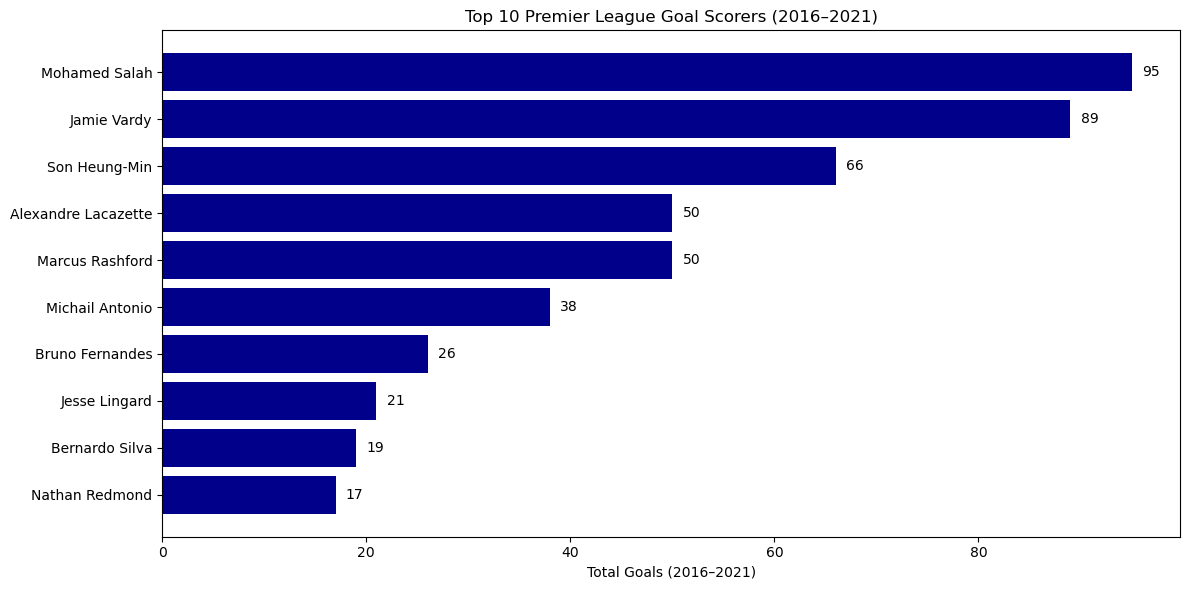

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the aggregated goals data (from the previous script)
df = pd.read_csv("epl_total_goals_2016_to_2021.csv")

# Get top 10 players
top_10 = df.nlargest(10, "total_goals")

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10["player"], top_10["total_goals"], color="darkblue")
plt.xlabel("Total Goals (2016–2021)")
plt.title("Top 10 Premier League Goal Scorers (2016–2021)")
plt.gca().invert_yaxis()  # Highest at the top

# Add goal numbers on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, str(int(width)), va='center')

plt.tight_layout()
plt.show()


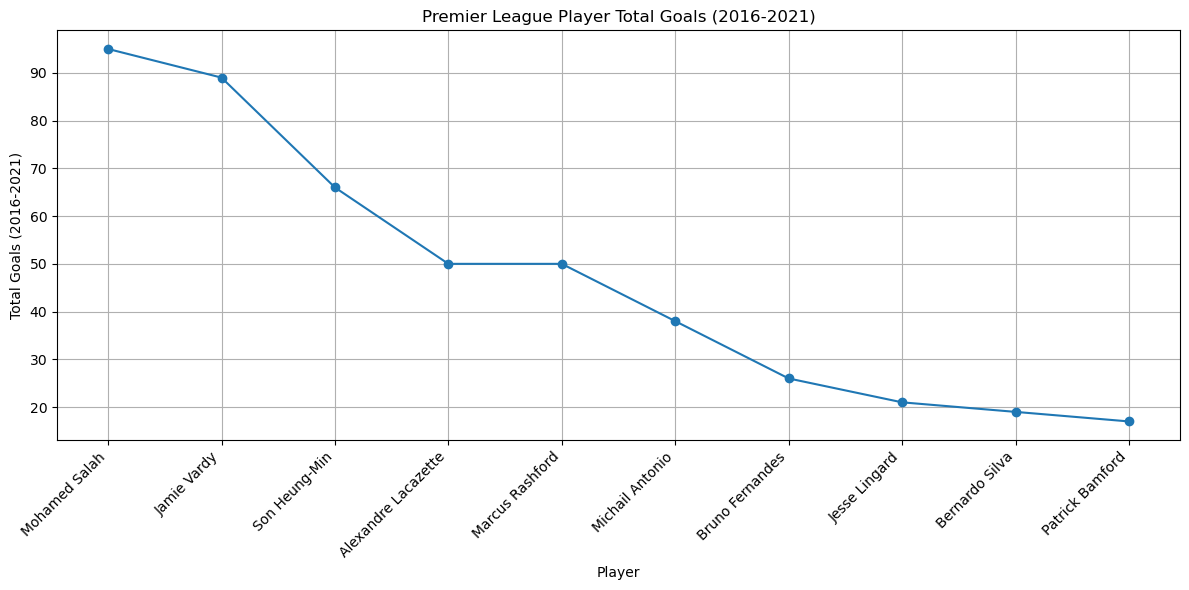

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your cleaned data
df = pd.read_csv("epl_total_goals_2016_to_2021.csv")

# Sort by total goals descending (optional)
df = df.sort_values("total_goals", ascending=False).head(10)

# Plot line graph: players vs total goals
plt.figure(figsize=(12,6))
plt.plot(df["player"], df["total_goals"], marker='o', linestyle='-')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Player")
plt.ylabel("Total Goals (2016-2021)")
plt.title("Premier League Player Total Goals (2016-2021)")
plt.tight_layout()
plt.grid(True)
plt.show()


## Sample betting prediction using Neural Networks

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load CSV data
df = pd.read_csv("odds_api.csv")

# Step 2: Clean data (drop rows with missing odds)
df = df.dropna(subset=["home_win_odds", "draw_odds", "away_win_odds"])

# Step 3: Simulate result labels (for demo purposes only)
np.random.seed(42)
df["result"] = np.random.choice(["home", "draw", "away"], size=len(df))

# Step 4: Encode labels
le = LabelEncoder()
y = le.fit_transform(df["result"])

# Step 5: Features
X = df[["home_win_odds", "draw_odds", "away_win_odds"]].values

# Step 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build and train model (MLPClassifier)
model = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=10000, random_state=42)
model.fit(X_train, y_train)

# Step 8: Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("✅ Test Accuracy:", round(accuracy * 100, 2), "%")

# Step 9: Predict on a new sample bet
sample_odds = np.array([[1.55, 4.2, 6.5]])  # Example: Home favorite
predicted_class = le.inverse_transform(model.predict(sample_odds))

print("🧾 Predicted Outcome:", predicted_class[0])


✅ Test Accuracy: 52.78 %
🧾 Predicted Outcome: home
